In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree # DecisionTreeClassifier is used to create a decision tree model for classification tasks. plot_tree is used to visualize the decision tree.
from sklearn.model_selection import train_test_split # train_test_split is used to split the dataset into training and testing sets.
from sklearn.metrics import (
    confusion_matrix, # Computes the confusion matrix to evaluate the accuracy of a classification.
    accuracy_score, # Computes the accuracy of the model.
    precision_score, # Computes the precision of the model.
    recall_score, # Computes the recall of the model.means the ability of the model to find all the relevant cases within a dataset.
    f1_score, # Computes the F1 score of the model. Means the harmonic mean of precision and recall.
    roc_curve, # Computes the Receiver Operating Characteristic (ROC) curve.
    auc, # Computes the Area Under the Curve (AUC) for the ROC curve.
)

# Make plots a bit larger by default
plt.rcParams['figure.figsize'] = (7, 5) # .rcParams is a dictionary-like variable that contains default settings for matplotlib which is used to customize the appearance of plots.



In [3]:
#Create a small synthetic dataset
# synthetic dataset means a dataset that is artificially created rather than collected from real-world observations. Such datasets are often used for testing, experimentation, or demonstration purposes.
data = {
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy'],
    'Windy':   [0,        1,       0,        1,        0,        1,        0,       1],
    'Play':    [1,        0,       1,        1,        0,        0,        1,       0]
}
df_synthetic = pd.DataFrame(data)
df_synthetic

,Weather,Windy,Play
0,Sunny,0,1
1,Rainy,1,0
2,Sunny,0,1
3,Sunny,1,1
4,Rainy,0,0
5,Rainy,1,0
6,Sunny,0,1
7,Rainy,1,0


Encode categorical feature and prepare X, y
Machine learning models in sklearn expect numeric inputs. We will encode:

Sunny → 1
Rainy → 0
Windy is already numeric (0/1), so we can use it directly. The target variable Play is already 0/1.

In [4]:
#Encode categorical feature and prepare X, y
df_synthetic['Weather_num'] = df_synthetic['Weather'].map({'Sunny':1, 'Rainy':0})
# it means create a new column 'Weather_num' in the DataFrame df_synthetic by mapping the values in the 'Weather' column. The mapping is defined such that 'Sunny' is replaced with 1 and 'Rainy' is replaced with 0.
X_syn = df_synthetic[['Weather_num','Windy']] #defining a variable X_syn to hold the feature set for the synthetic dataset. It selects the columns 'Weather_num' and 'Windy' from the DataFrame df_synthetic to be used as features for model training.
y_syn = df_synthetic['Play'] #defining a variable y_syn to hold the target variable for the synthetic dataset. It selects the column 'Play' from the DataFrame df_synthetic to be used as the target variable for model training.
print(X_syn)
print(y_syn)

   Weather_num  Windy
0            1      0
1            0      1
2            1      0
3            1      1
4            0      0
5            0      1
6            1      0
7            0      1
0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    0
Name: Play, dtype: int64


Train a simple decision tree
We now train a decision tree classifier.

We set max_depth=3 just to keep the tree small.
We fit the model on all data (since the goal here is intuition, not evaluation).

In [5]:
#Train a simple decision tree
tree_syn = DecisionTreeClassifier(max_depth=3, random_state=42) # defining a variable tree_syn to hold a DecisionTreeClassifier model. The model is configured with a maximum depth of 3, meaning the tree can have up to 3 levels of splits. The random_state parameter is set to 42 to ensure reproducibility of results.
tree_syn.fit(X_syn,y_syn) # what it does is to find patterns in the data to predict the target variable y_syn based on features X_syn
tree_syn # trained decision tree model

DecisionTreeClassifier(max_depth=3, random_state=42)

Visualize the tree
Now we plot the tree. This helps students see:

The root split
Branches
Leaf predictions
How many samples go to each node
Note: class_names=['No', 'Yes'] aligns with Play: 0 = No, 1 = Yes.

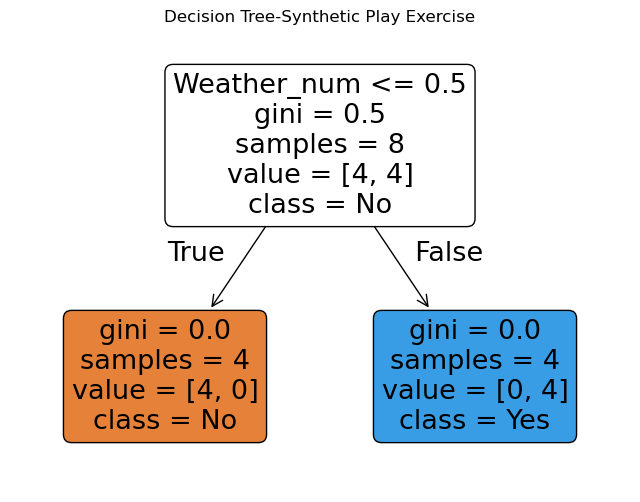

In [6]:
#Visualize the tree
plt.figure(figsize=(8,6)) # create a new figure for plotting with a specified size of 8 inches in width and 6 inches in height.
plot_tree( 
    tree_syn, # the decision tree model to be visualized.
    feature_names=['Weather_num','Windy'], # names of the features used in the model.
    class_names = ['No', 'Yes'], # names of the target classes.
    filled = True,
    rounded = True,
)
plt.title("Decision Tree-Synthetic Play Exercise")
plt.show()

Quick prediction examples
We can now test how the model behaves on a few example cases. You can ask students to guess the output before showing the prediction.

In [7]:
# Example: Sunny (1), not windy (0)
example_1 = pd.DataFrame([[1,0]], columns = ['Weather_num', 'Windy']) # create a dataframe for the example
pred_1 = tree_syn.predict(example_1)[0] # predict the class for the example
print('Sunny, not windy -> Play prediction: ',pred_1)

# Example: Rainy (0), windy (1)
example_2 = pd.DataFrame([[0,1]], columns = ['Weather_num', 'Windy']) # create a dataframe for the example
pred_2 = tree_syn.predict(example_2)[0] # predict the class for the example
print('Rainy, windy -> Play prediction: ',pred_2)

Sunny, not windy -> Play prediction:  1
Rainy, windy -> Play prediction:  0


Module 11.4 – Overfitting and Pruning
In this section, we will:

See how a deep tree can overfit
Compare it with a pruned tree using max_depth
Compare training vs test performance
We will use a slightly larger synthetic dataset so that overfitting becomes visible.

11.4.1 Create a slightly larger synthetic dataset

We create a synthetic binary classification dataset using sklearn.datasets.make_classification. This is not a real medical dataset, but it is enough to show overfitting clearly.

In [8]:
#Create a slightly larger synthetic dataset
from sklearn.datasets import make_classification # make_classification is a function from sklearn.datasets module that is used to generate a synthetic dataset for classification tasks. It allows you to create datasets with specified characteristics, such as the number of samples, features, informative features, redundant features, and classes.

X_big, y_big = make_classification( #make_classification function is being used to generate a synthetic dataset for classification tasks. The generated dataset consists of features (X_big) and corresponding target labels (y_big).
    n_samples=400,#Total data points
    n_features=5,#Total feature number
    n_informative=3,#Total relevant features for the target variable
    n_redundant=0,#No strong correlation among the features means no redundant features
    n_classes=2,#Target variable/feature class number means binary classification
    random_state=42,#Every time we will get the similar random dataset means reproducibility
)

X_train_big, X_test_big, y_train_big, y_test_big = train_test_split( 
    X_big, y_big, test_size=0.3, random_state=42
)
# X_train_big, X_test_big, y_train_big, y_test_big these are the training and testing sets created by splitting the synthetic dataset. X_train_big and y_train_big are used to train the model, while X_test_big and y_test_big are used to evaluate its performance.

# train_test_split( X_big, y_big, test_size=0.3, random_state=42) what is happening here is that the synthetic dataset (X_big, y_big) is being split into training and testing sets. 30% of the data is allocated for testing (test_size=0.3), and the random_state parameter ensures that the split is reproducible.
X_train_big.shape, X_test_big.shape # checking the shapes of the training and testing feature sets

((280, 5), (120, 5))

Train a deep tree vs a prun

We now train two models:

deep_tree: no depth limit (can easily overfit)
pruned_tree: max_depth=3
We compare their training and test accuracy.

In [9]:
#Train a deep tree vs a pruned tree
deep_tree = DecisionTreeClassifier(random_state=42) # declaring a variable where a funtion is assigned to it. Here, DecisionTreeClassifier is a function that creates a decision tree model for classification tasks. The random_state parameter is set to 42 to ensure reproducibility of results.
deep_tree.fit(X_train_big, y_train_big) # fitting the deep_tree model to the training data (X_train_big and y_train_big). This process involves finding patterns in the training data to make predictions.

pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42) # declaring a variable where a funtion is assigned to it. Here, DecisionTreeClassifier is a function that creates a decision tree model for classification tasks. The max_depth parameter is set to 3, which limits the depth of the tree to prevent overfitting. The random_state parameter is set to 42 to ensure reproducibility of results.
pruned_tree.fit(X_train_big, y_train_big) # fitting the pruned_tree model to the training data (X_train_big and y_train_big). This process involves finding patterns in the training data to make predictions.

y_train_pred_deep = deep_tree.predict(X_train_big) # predicting the target variable for the training data (X_train_big) using the deep_tree model. The predicted values are stored in the variable y_train_pred_deep.
y_test_pred_deep = deep_tree.predict(X_test_big) # predicting the target variable for the testing data (X_test_big) using the deep_tree model. The predicted values are stored in the variable y_test_pred_deep.

y_train_pred_pruned = pruned_tree.predict(X_train_big) # predicting the target variable for the training data (X_train_big) using the pruned_tree model. The predicted values are stored in the variable y_train_pred_pruned.
y_test_pred_pruned = pruned_tree.predict(X_test_big) # predicting the target variable for the testing data (X_test_big) using the pruned_tree model. The predicted values are stored in the variable y_test_pred_pruned.

print('Deep tree – train accuracy:', round(accuracy_score(y_train_big, y_train_pred_deep), 3)) # calculating and printing the accuracy of the deep_tree model on the training data. The accuracy_score function compares the true labels (y_train_big) with the predicted labels (y_train_pred_deep) and computes the accuracy. The result is rounded to three decimal places and printed.
print('Deep tree – test accuracy :', round(accuracy_score(y_test_big, y_test_pred_deep), 3)) # calculating and printing the accuracy of the deep_tree model on the testing data. The accuracy_score function compares the true labels (y_test_big) with the predicted labels (y_test_pred_deep) and computes the accuracy. The result is rounded to three decimal places and printed.
print() 
print('Pruned tree – train accuracy:', round(accuracy_score(y_train_big, y_train_pred_pruned), 3))  # calculating and printing the accuracy of the pruned_tree model on the training data. The accuracy_score function compares the true labels (y_train_big) with the predicted labels (y_train_pred_pruned) and computes the accuracy. The result is rounded to three decimal places and printed.
print('Pruned tree – test accuracy :', round(accuracy_score(y_test_big, y_test_pred_pruned), 3)) # calculating and printing the accuracy of the pruned_tree model on the testing data. The accuracy_score function compares the true labels (y_test_big) with the predicted labels (y_test_pred_pruned) and computes the accuracy. The result is rounded to three decimal places and printed.

Deep tree – train accuracy: 1.0
Deep tree – test accuracy : 0.883

Pruned tree – train accuracy: 0.904
Pruned tree – test accuracy : 0.892


We now visualize both trees. The deep tree will usually be more complex than the pruned one.

To keep the plots readable, we only show a few top levels of the deep tree.

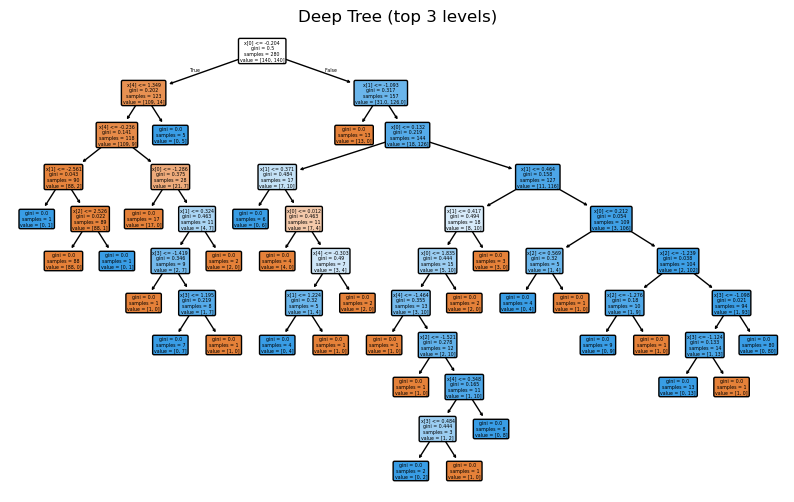

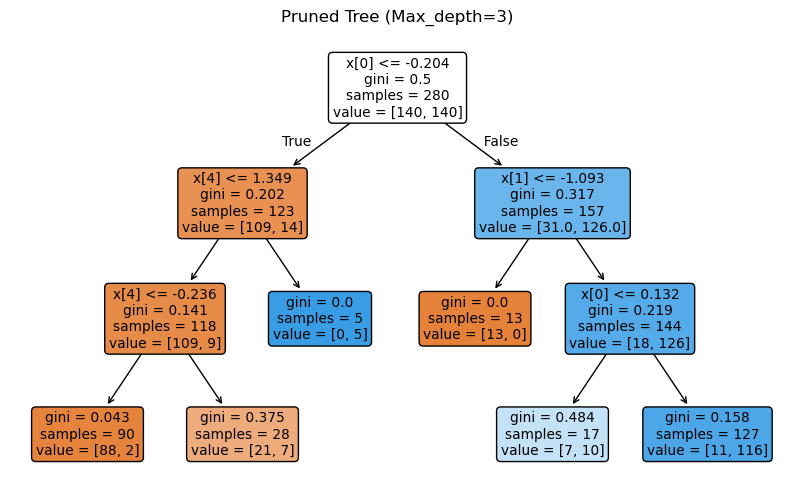

In [10]:
# Plot deep tree (showing only top levels for readability)
plt.figure(figsize=(10,6))
plot_tree(deep_tree, filled=True,rounded=True)
plt.title("Deep Tree (top 3 levels)")
plt.show()

# Plot pruned tree
plt.figure(figsize=(10,6))
plot_tree(pruned_tree, filled=True,rounded=True)
plt.title("Pruned Tree (Max_depth=3)")
plt.show()

From the accuracy and the plots you can highlight:

Deep tree often has very high training accuracy but may drop on test data.
Pruned tree has slightly lower training accuracy but often better or more stable test performance.
This demonstrates overfitting vs generalization.

Module 11.5 – Evaluating a Decision Tree (Accuracy, Precision, Recall, F1, Confusion Matrix)
In this section, we will:

Create a heart-disease-like synthetic dataset
Train a decision tree classifier
Compute and interpret:
Confusion matrix
Accuracy
Precision
Recall
F1 score

Create a toy heart-disease-like dataset
We simulate a dataset with a few features:

age
chol (cholesterol)
thalach (max heart rate achieved)
The target target will be 0 or 1 (no disease vs disease).

In [11]:
# so the flowchart to determine any model accuracy and performance is:
# 1. Prepare Data -> 2. Split Data -> 3. Train Model -> 4. Make Predictions -> 5. Evaluate Model
# 1. preparing data is done above where we created synthetic dataset named X_big and y_big
# 2. 

In [12]:
np.random.seed(42) # Setting a random seed for reproducibility of results. This ensures that the random numbers generated in the following code will be the same each time the code is run.
n_samples = 300 # number of samples to generate for the synthetic dataset

age = np.random.randint(30, 80, size=n_samples) # generating random integers between 30 and 80 (inclusive) to represent ages. The size parameter specifies that 300 random integers should be generated, corresponding to the number of samples defined earlier.
chol = np.random.randint(150, 300, size=n_samples) # generating random integers between 150 and 300 (inclusive) to represent cholesterol levels. The size parameter specifies that 300 random integers should be generated, corresponding to the number of samples defined earlier.
thalach = np.random.randint(90, 200, size=n_samples) # generating random integers between 90 and 200 (inclusive) to represent maximum heart rates achieved. The size parameter specifies that 300 random integers should be generated, corresponding to the number of samples defined earlier.

# We create a simple rule-based probability for disease just for realism
risk_score = 0.03 * (age - 40) + 0.02 * (chol - 200) - 0.02 * (thalach - 140) # calculating a risk score for heart disease based on age, cholesterol levels, and maximum heart rate achieved. The formula combines these factors with specific weights to compute a risk score for each individual in the dataset.
prob = 1 / (1 + np.exp(-0.05 * risk_score)) # applying the logistic function to the risk_score to convert it into a probability value between 0 and 1. This transformation is commonly used in logistic regression to model probabilities.

target = (prob > np.median(prob)).astype(int) # creating a binary target variable (0 or 1) based on whether the computed probability exceeds the median probability. This simulates the presence (1) or absence (0) of heart disease.

df_heart = pd.DataFrame({
    'age': age,
    'chol': chol,
    'thalach': thalach,
    'target': target
})

df_heart.head(10)

,age,chol,thalach,target
0,68,253,128,1
1,58,233,90,1
2,44,261,92,1
3,72,248,166,1
4,37,242,181,0
5,50,295,151,1
6,68,277,152,1
7,48,259,114,1
8,52,231,145,0
9,40,203,122,0


Train-test split and model training
We now split the dataset into training and test sets and train a decision tree classifier.



In [13]:
#Train-test split and model training
X_heart = df_heart[['age','chol','thalach']]
y_heart = df_heart['target']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_heart, y_heart, test_size=0.2, random_state=42
)

tree_heart = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_heart.fit(X_train_h, y_train_h)

tree_heart

DecisionTreeClassifier(max_depth=4, random_state=42)

Confusion matrix
We compute predictions on the test set and build the confusion matrix.

Then we visualize it as a simple heatmap using matplotlib.

In [14]:
#Confusion matrix
y_pred_h = tree_heart.predict(X_test_h) # predicting the target variable for the testing data (X_test_h) using the trained decision tree model (tree_heart). The predicted values are stored in the variable y_pred_h.

cm = confusion_matrix(y_test_h, y_pred_h) # computing the confusion matrix to evaluate the performance of the decision tree model (tree_heart) on the testing data. The confusion_matrix function compares the true labels (y_test_h) with the predicted labels (y_pred_h) and generates a matrix that summarizes the model's performance in terms of true positives, true negatives, false positives, and false negatives.
print(cm) 

[[23  3]
 [ 6 28]]


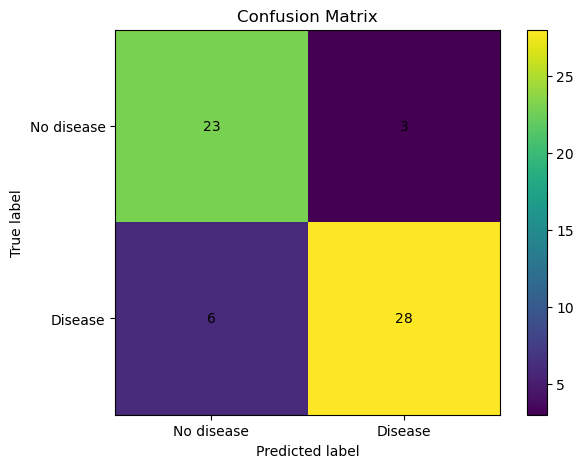

In [15]:
#Plot of Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation = 'nearest')
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

# Show all ticks and label them
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["No disease", 'Disease'])
ax.set_yticklabels(["No disease", 'Disease'])

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j,i,cm[i,j], ha='center', va='center')

plt.colorbar(im)
plt.show()

Accuracy, precision, recall, F1
Now we compute the standard classification metrics.

For interpretation:

Accuracy: overall correctness
Precision: among predicted positive, how many are truly positive
Recall: among actual positive, how many we caught
F1: harmonic mean of precision and recall

In [16]:
#Accuracy, precision, recall, F1
acc = accuracy_score(y_test_h,y_pred_h)
prec = precision_score(y_test_h,y_pred_h)
rec = recall_score(y_test_h,y_pred_h)
f1 = f1_score(y_test_h,y_pred_h)

print('Accuracy :', round(acc, 3))
print('Precision:', round(prec, 3))
print('Recall   :', round(rec, 3))
print('F1 score :', round(f1, 3))

Accuracy : 0.85
Precision: 0.903
Recall   : 0.824
F1 score : 0.862


Is this model missing many disease cases? (look at recall)
Is it falsely alarming many healthy patients? (look at precision)
Does F1 look balanced?

ROC Curve and AUC
In this final section we:

Get predicted probabilities for the positive class
Compute the ROC curve (TPR vs FPR at different thresholds)
Compute AUC (Area Under the Curve)
Interpret what these mean for model quality.

Predicted probabilities
For ROC curves, we do not use just the final predictions (0 or 1). We use the predicted probability of the positive class.



In [17]:
#Predicted probabilities
y_proba_h = tree_heart.predict_proba(X_test_h)[:, 1] 
y_proba_h[:10]

array([0.875     , 0.        , 0.04761905, 0.        , 0.875     ,
       1.        , 1.        , 1.        , 1.        , 0.        ])

ROC curve and AUC
We now compute:

fpr (false positive rate)
tpr (true positive rate)
thresholds used
Then we compute AUC and plot the ROC curve.

In [18]:
#ROC curve and AUC
fpr,tpr,thresholds = roc_curve(y_test_h, y_proba_h)
roc_auc = auc(fpr,tpr)
print('AUC: ',round(roc_auc, 3))

AUC:  0.925


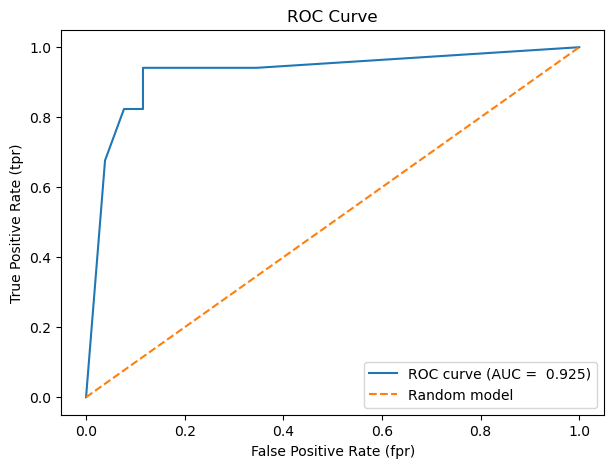

In [19]:
#Plot
plt.figure()
plt.plot(fpr,tpr, label=f'ROC curve (AUC = {roc_auc: .3f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random model')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title("ROC Curve")
plt.legend()
plt.show()

Interpretation tips:

A curve closer to the top-left corner is better.
AUC near 1.0 means strong separation between classes.
AUC near 0.5 means the model is no better than random.


Wrap-up
In this single notebook you have seen:

How to build and visualize a simple decision tree (11.3)
How deep trees can overfit and how pruning helps (11.4)
How to evaluate a classifier using confusion matrix and metrics (11.5)
How to use ROC curve and AUC for threshold-independent evaluation (11.6)
Your task would be to replace the synthetic data with real datasets like heart disease, Titanic, or your own custom data.



Predicted classes: [1 0 1 0 1 0 1 0 1 0]
Confusion Matrix:
 [[5 0]
 [0 5]]
Precision: 1.0
Recall   : 1.0
F1 score : 1.0

With threshold 0.3:
Confusion Matrix:
 [[3 2]
 [0 5]]
Precision: 0.714
Recall   : 1.0
F1 score : 0.833


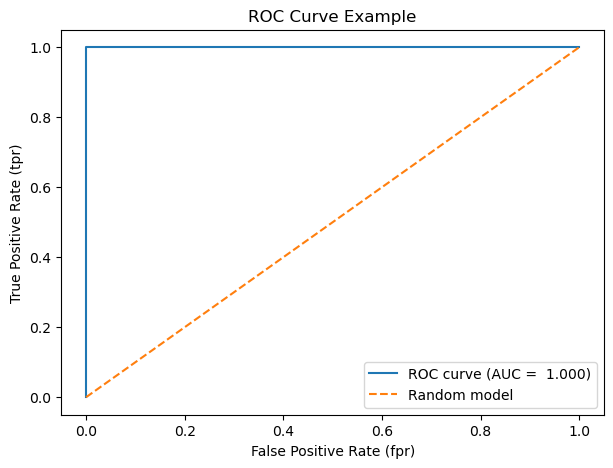

AUC:  1.0


In [ ]:
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

#now these are two numpy arrays: y_true and y_prob.
#With threshold 0.5, convert probabilities to class predictions
y_pred = (y_prob >= 0.5).astype(int)
print('Predicted classes:', y_pred)

# compute:

# Confusion matrix
# Precision
# Recall
# F1 score
cm_example = confusion_matrix(y_true, y_pred)
prec_example = precision_score(y_true, y_pred)
rec_example = recall_score(y_true, y_pred)
f1_example = f1_score(y_true, y_pred)
print('Confusion Matrix:\n', cm_example)
print('Precision:', round(prec_example,3))
print('Recall   :', round(rec_example,3))
print('F1 score :', round(f1_example,3))

# With threshold 0.3, convert probabilities to class predictions again and recompute the same metrics.
y_pred_03 = (y_prob >= 0.3).astype(int)
cm_example_03 = confusion_matrix(y_true, y_pred_03)
prec_example_03 = precision_score(y_true, y_pred_03)
rec_example_03 = recall_score(y_true, y_pred_03)
f1_example_03 = f1_score(y_true, y_pred_03)
print('\nWith threshold 0.3:')
print('Confusion Matrix:\n', cm_example_03)
print('Precision:', round(prec_example_03,3))
print('Recall   :', round(rec_example_03,3))
print('F1 score :', round(f1_example_03,3))


#In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.
# Lowering the threshold from 0.5 to 0.3 increased recall but decreased precision. This happens because a lower threshold means that more instances are classified as positive, which captures more true positives (increasing recall) but also includes more false positives (decreasing precision). Essentially, the model becomes more sensitive to detecting positive cases at the cost of making more incorrect positive predictions.

#Plot the ROC curve using y_true and y_prob.
fpr_ex, tpr_ex, thresholds_ex = roc_curve(y_true, y_prob)
roc_auc_ex = auc(fpr_ex, tpr_ex)
plt.figure()
plt.plot(fpr_ex, tpr_ex, label=f'ROC curve (AUC = {roc_auc_ex: .3f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random model')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title("ROC Curve Example")  
plt.legend()
plt.show()

#Compute the AUC and print it with 3 decimal places.
print('AUC: ', round(roc_auc_ex, 3))

#Add a one or two line comment on what a high or low AUC means in this context.
# A high AUC indicates that the model has a good ability to distinguish between positive and negative classes, meaning it can effectively identify true positives while minimizing false positives. Conversely, a low AUC suggests that the model performs poorly in distinguishing between the classes, leading to a higher rate of misclassification.

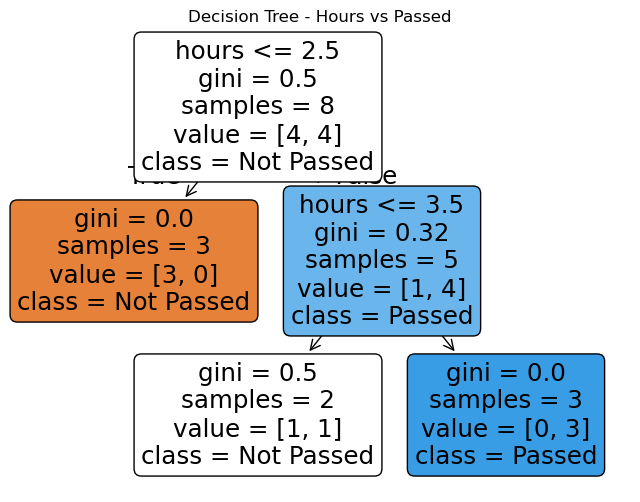

In [ ]:
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})

df3
#Fit a DecisionTreeClassifier(max_depth=2) to predict passed from hours.
X_df3 = df3[['hours']]
y_df3 = df3['passed']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_df3, y_df3, test_size=0.2, random_state=42
)

tree_df3 = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_df3.fit(X_train_h, y_train_h)

tree_df3

#Plot the tree using plot_tree.
plt.figure(figsize=(8,6))
plot_tree(
    tree_df3,
    feature_names=['hours'],
    class_names=['Not Passed', 'Passed'],
    filled=True,
    rounded=True,
)
plt.title("Decision Tree - Hours vs Passed")
plt.show()

#Write 2 to 3 lines explaining whether the tree looks like it might overfit or generalize well, given the dataset size and the model depth.
# The decision tree has a max depth of 4, which may be relatively deep given the small size of the dataset (only 10 samples). This depth could lead to overfitting, as the model might capture noise in the training data rather than general patterns. A shallower tree might generalize better for such a small dataset.